# Course project part 1 | Text embeddings on S&P 500 data

## Student name: Vilchis Razo Luis Alfredo
## Tuition: A01796353

# Introduction to text embeddings on S&P 500 news

objectives# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Retrieve Financial News:**
   - Use the `yfinance` library to gather news headlines for all companies in the S&P 500 index.

2. **Clean and Structure Financial Text Data:**
   - Extract and organize relevant metadata (e.g., ticker, title, summary, publication date, URL) into a structured pandas DataFrame.

3. **Generate Text Embeddings:**
   - Apply a pre-trained sentence transformer model (`all-MiniLM-L6-v2`) to convert news headlines and summaries into numerical embeddings.

4. **Apply Clustering Techniques:**
   - Use K-Means clustering to identify groups of similar news articles based on semantic content.

5. **Determine Optimal Number of Clusters:**
   - Evaluate clustering quality using silhouette scores to find the best number of clusters.

6. **Visualize High-Dimensional Embeddings:**
   - Reduce the embedding space using PCA and visualize clusters in two dimensions.

7. **Interpret Cluster Themes:**
   - Analyze representative news


## Install and Import important librairies

In [1]:
# Installing libraries

%pip install pandas
%pip install yfinance
%pip install lxml
%pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
# Importing libraries

from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics import silhouette_score
import yfinance as yf
from datetime import datetime
import time

## Get the list of stocks in the S&P 500

In [3]:
# Read and print the stock tickers that make up S&P500

df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

display(df_tickers.head())

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the news of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the news of all 500 stocks in the index.
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

### Get the news in a dictionary

In [5]:
# Create a dictionary where the keys are the symbols (tickers) of each 500 stocks
# and the value is the output news from the yfinance library

# Getting news by ticker

news_dict = {}
for symbol in ticker_list:
    try:
        ticker = yf.Ticker(symbol)
        news = ticker.news
        news_dict[symbol] = news
        print(f"✓ News downloaded for {symbol}")
        time.sleep(1)  # avoid rate-limit
    except Exception as e:
        print(f"⚠️ Error getting news from {symbol}: {e}")
        news_dict[symbol] = []

✓ News downloaded for MMM
✓ News downloaded for AOS
✓ News downloaded for ABT
✓ News downloaded for ABBV
✓ News downloaded for ACN
✓ News downloaded for ADBE
✓ News downloaded for AMD
✓ News downloaded for AES
✓ News downloaded for AFL
✓ News downloaded for A
✓ News downloaded for APD
✓ News downloaded for ABNB
✓ News downloaded for AKAM
✓ News downloaded for ALB
✓ News downloaded for ARE
✓ News downloaded for ALGN
✓ News downloaded for ALLE
✓ News downloaded for LNT
✓ News downloaded for ALL
✓ News downloaded for GOOGL
✓ News downloaded for GOOG
✓ News downloaded for MO
✓ News downloaded for AMZN
✓ News downloaded for AMCR
✓ News downloaded for AEE
✓ News downloaded for AEP
✓ News downloaded for AXP
✓ News downloaded for AIG
✓ News downloaded for AMT
✓ News downloaded for AWK
✓ News downloaded for AMP
✓ News downloaded for AME
✓ News downloaded for AMGN
✓ News downloaded for APH
✓ News downloaded for ADI
✓ News downloaded for AON
✓ News downloaded for APA
✓ News downloaded for APO
✓ N

### Structure the news into a pandas dataframe

Your final dataframe should have the following columns:
- TICKER
- TITLE (of the news)
- SUMMARY (of the news)
- PUBLICATION_DATE (of the news)
- URL (of the news)

Note: all of those fields are provided in the yfinance news component. Refer to the library documentation.

In [6]:
# Structuring news in a Pandas data frame

news_data = []
for ticker, articles in news_dict.items():
    for article in articles:
        try:
            content = article.get('content', {})
            title = content.get('title')
            summary = content.get('summary')

            if title:
                pub_time = content.get('pubDate')
                pub_date = datetime.fromisoformat(pub_time.replace('Z', '+00:00')) if pub_time else None
                url = content.get('canonicalUrl', {}).get('url')

                news_data.append({
                    'TICKER': ticker,
                    'TITLE': title,
                    'SUMMARY': summary if summary else '',
                    'PUBLICATION_DATE': pub_date,
                    'URL': url
                })
        except Exception as e:
            print(f"⚠️ Error processing news from {ticker}: {e}")

# Create the DataFrame

df_news = pd.DataFrame(news_data)

In [7]:
# Leakage of valid news

df_news = df_news[df_news['TITLE'].notna() & (df_news['TITLE'].str.strip() != '')]
print(f"✅ News with valid title: {df_news.shape[0]}")
display(df_news[['TICKER', 'TITLE']].head())

✅ News with valid title: 4991


,TICKER,TITLE
0,MMM,3M Company (MMM): “I Was Surprised” By The Org...
1,MMM,"Zacks Industry Outlook Highlights Honeywell, 3..."
2,MMM,"Stock Market News for Jul 21, 2025"
3,MMM,3M Co (MMM) Q2 2025 Earnings Call Highlights: ...
4,MMM,MMM Q1 Deep Dive: Tariffs Loom Over Stable Ope...


## Exploring text embeddings

- Use the open-source model: 'sentence-transformers/all-MiniLM-L6-v2' to create embeddings on the news title and summary
- Add a column to your news dataframe called EMBEDDED_TEXT using ONLY the TITLE of the news
- Add a column to your news dataframe called EMBEDDINGS, which contains the embedding of EMBEDDED_TEXT


In [8]:
# Exploring text embeddings

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
df_news['EMBEDDED_TEXT'] = df_news['TITLE'].fillna('')
embeddings = model.encode(df_news['EMBEDDED_TEXT'].tolist(), show_progress_bar=True)
df_news['EMBEDDINGS'] = embeddings.tolist()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/156 [00:00<?, ?it/s]

## Using K-means clustering on news embeddings
to simplify, keep only one news for each company (ticker), you should have 500 rows in your news dataframe

In [9]:
# K-means clustering in news embeddings

# Reduce the DataFrame to one row per ticker

df_one_news_per_ticker = df_news.groupby('TICKER', as_index=False).first()
print(f"✅ Unique news per ticker: {df_one_news_per_ticker.shape[0]}")
display(df_one_news_per_ticker[['TICKER', 'TITLE', 'EMBEDDED_TEXT']].head())

# Convert embeddings column to NumPy array

X_embeddings = np.array(df_one_news_per_ticker['EMBEDDINGS'].tolist())

# Check if X_embeddings is not empty before proceeding

if X_embeddings.shape[0] > 0:
    print(f"✅ Embedding form: {X_embeddings.shape}")

    from sklearn.cluster import KMeans

    # Choose number of clusters

    n_clusters = 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_embeddings)
    df_one_news_per_ticker['CLUSTER'] = cluster_labels

    # Add to DataFrame

    print("✅ Assigned Clusters (Example):")
    display(df_one_news_per_ticker[['TICKER', 'TITLE', 'CLUSTER']].head())

    # View distribution by cluster

    print("🔎 News distribution by cluster:")
    display(df_one_news_per_ticker['CLUSTER'].value_counts())
else:
    print("⚠️ No embeddings to cluster.")

✅ Unique news per ticker: 500


,TICKER,TITLE,EMBEDDED_TEXT
0,A,Agilent Technologies' Q3 2025 Earnings: What t...,Agilent Technologies' Q3 2025 Earnings: What t...
1,AAPL,"Earnings live: Whirlpool, Tilray stocks tumble...","Earnings live: Whirlpool, Tilray stocks tumble..."
2,ABBV,HS market forecast to reach $7.8bn across 7MM ...,HS market forecast to reach $7.8bn across 7MM ...
3,ABNB,‘I Prep for Survival’: OpenAI CEO Sam Altman W...,‘I Prep for Survival’: OpenAI CEO Sam Altman W...
4,ABT,Revvity trims 2025 profit forecast as China po...,Revvity trims 2025 profit forecast as China po...


✅ Embedding form: (500, 384)
✅ Assigned Clusters (Example):


,TICKER,TITLE,CLUSTER
0,A,Agilent Technologies' Q3 2025 Earnings: What t...,1
1,AAPL,"Earnings live: Whirlpool, Tilray stocks tumble...",4
2,ABBV,HS market forecast to reach $7.8bn across 7MM ...,7
3,ABNB,‘I Prep for Survival’: OpenAI CEO Sam Altman W...,8
4,ABT,Revvity trims 2025 profit forecast as China po...,4


🔎 News distribution by cluster:


,count
CLUSTER,
1,79
2,77
7,66
9,62
4,54
5,52
8,50
3,31
6,22


### Identify the number of clusters using the silhouette score

- Using a for loop, do the clustering with different k values (number of clusters), test 1 to 6 clusters
- Compute the silhouette score for every k value
- Plot the silhouette score for different k values

#### Try different values of k and compute silhouette scores

In [10]:
# Cluster identification using silhouette scoring

# Range of values of k

k_values = range(1, 7)
silhouette_scores = []

X_embeddings = np.array(df_one_news_per_ticker['EMBEDDINGS'].tolist())

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_embeddings)

    # Ensure that at least 2 real clusters were generated

    n_labels = len(set(labels))

    if n_labels > 1:
        score = silhouette_score(X_embeddings, labels)
        silhouette_scores.append(score)
        print(f"k = {k}, silhouette score = {score:.4f}")
    else:
        silhouette_scores.append(None)
        print(f"k = {k}, silhouette score could not be calculated (only {n_labels} cluster)")

k = 1, silhouette score could not be calculated (only 1 cluster)
k = 2, silhouette score = 0.0499
k = 3, silhouette score = 0.0477
k = 4, silhouette score = 0.0507
k = 5, silhouette score = 0.0354
k = 6, silhouette score = 0.0358


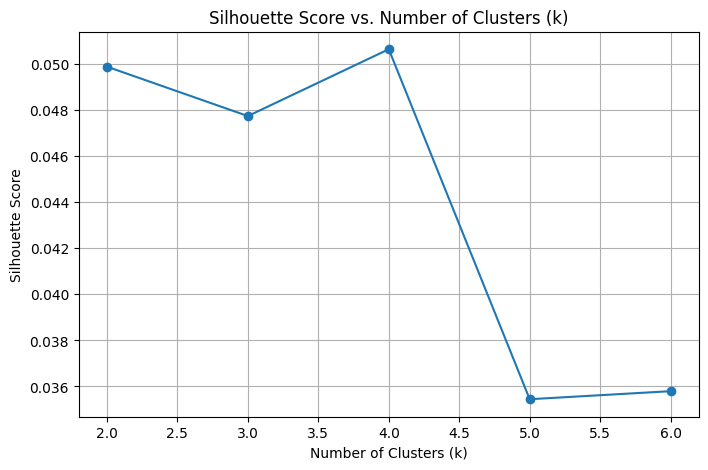

In [11]:
# Plot of silhouette score vs. number of clusters
# Filter valid values for plotting

valid_k = [k for k, s in zip(k_values, silhouette_scores) if s is not None]
valid_scores = [s for s in silhouette_scores if s is not None]

if valid_k:
    plt.figure(figsize=(8, 5))
    plt.plot(valid_k, valid_scores, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
else:
    print("No valid silhouette scores to plot.")

#### Plot silhouette scores

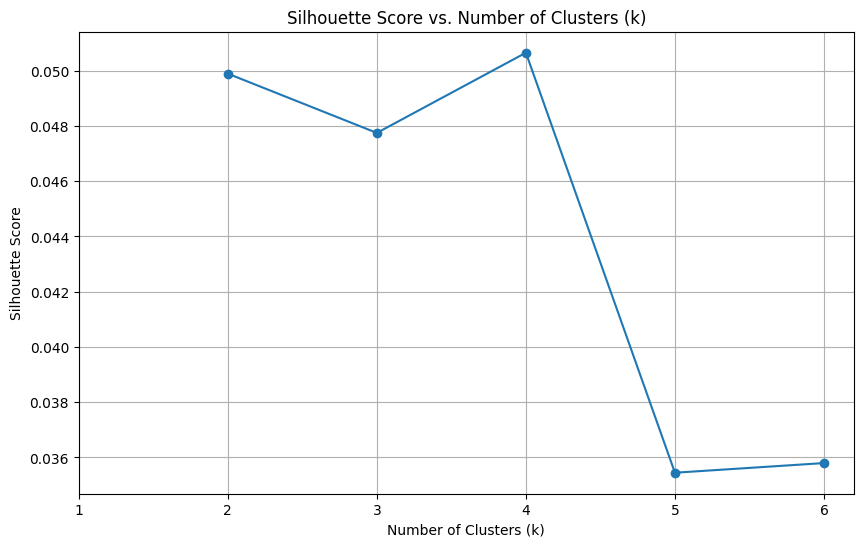

In [12]:
# Plotting silhouette scores

# Silhouette Scores Chart

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Identify the Best k

In [13]:
# Based on the silhouette score plot, the optimal number of clusters (k) is 3, as it has the highest score. We will proceed with k=3 for clustering.

#### Cluster the embeddings using 3 clusters (k=3)

In [14]:
# Embedding clustering with 3 clusters

# Clustering with optimal k (k=3)

n_clusters_best = 3
kmeans_best = KMeans(n_clusters=n_clusters_best, random_state=42)
cluster_labels_best = kmeans_best.fit_predict(X_embeddings)

# Add labels to the DataFrame

df_one_news_per_ticker['CLUSTER_K3'] = cluster_labels_best

# Show results

print("✅ Assigned clusters (k=3):")
display(df_one_news_per_ticker[['TICKER', 'TITLE', 'CLUSTER_K3']].head())

✅ Assigned clusters (k=3):


,TICKER,TITLE,CLUSTER_K3
0,A,Agilent Technologies' Q3 2025 Earnings: What t...,1
1,AAPL,"Earnings live: Whirlpool, Tilray stocks tumble...",2
2,ABBV,HS market forecast to reach $7.8bn across 7MM ...,0
3,ABNB,‘I Prep for Survival’: OpenAI CEO Sam Altman W...,0
4,ABT,Revvity trims 2025 profit forecast as China po...,0


### Visualize the 2 first PCA Components of your embeddings

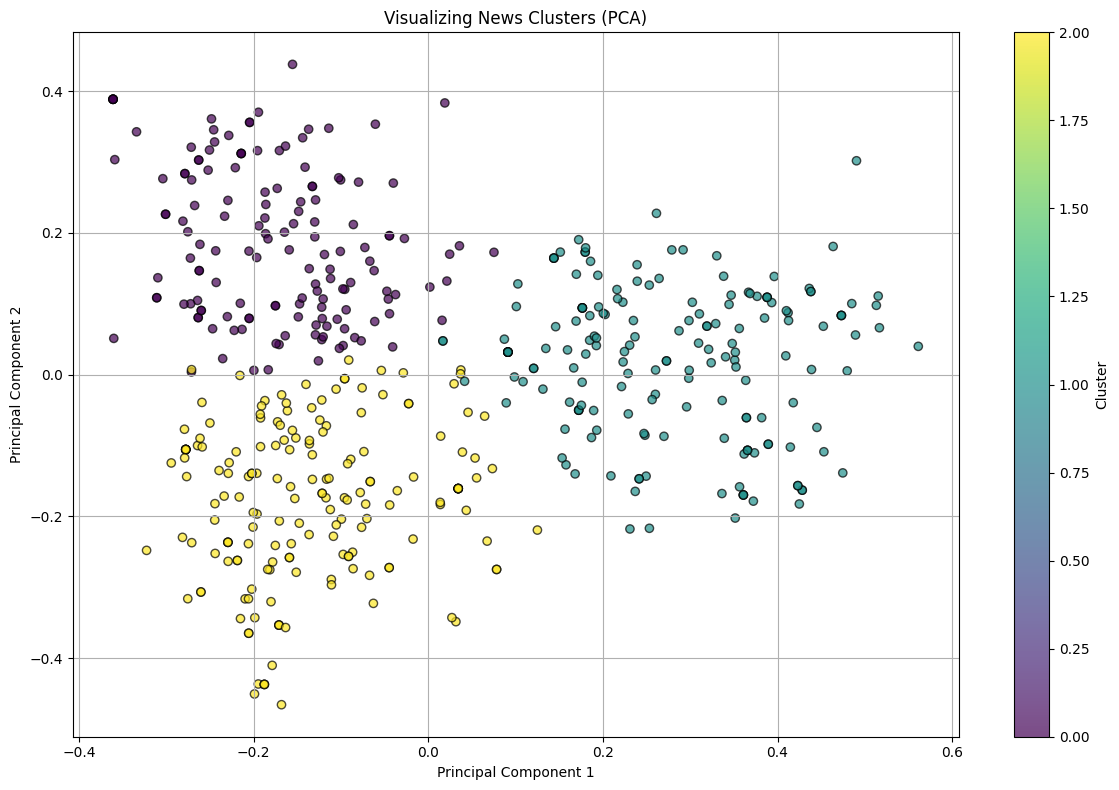

In [15]:
# Visualization of the first 2 PCA components

# Reduce dimensionality to 2 principal components

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_embeddings)

# Add PCA components to the DataFrame

df_one_news_per_ticker['PCA1'] = X_pca[:, 0]
df_one_news_per_ticker['PCA2'] = X_pca[:, 1]

# Plot clusters using PCA components

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_one_news_per_ticker['PCA1'],
    df_one_news_per_ticker['PCA2'],
    c=df_one_news_per_ticker['CLUSTER_K3'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)
plt.title('Visualizing News Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Analyze the content of each cluster
- Add the kmeans cluster label to your news dataframe
- Print the content of each cluster and analyze it

In [16]:
# Content analysis by cluster

for i in range(n_clusters_best):
    cluster_news = df_one_news_per_ticker[df_one_news_per_ticker['CLUSTER_K3'] == i]
    print(f"\n🔹 Cluster {i} — {len(cluster_news)} news")
    print("-" * 60)

    for index, row in cluster_news.head(5).iterrows():
        print(f"• {row['TITLE']}")
        print(f"  🔗 {row['URL']}")
        print(f"  🗓  {row['PUBLICATION_DATE'].strftime('%Y-%m-%d') if pd.notnull(row['PUBLICATION_DATE']) else 'Undated'}\n")


🔹 Cluster 0 — 148 news
------------------------------------------------------------
• HS market forecast to reach $7.8bn across 7MM by 2034
  🔗 https://www.pharmaceutical-technology.com/analyst-comment/hs-market-7mm-2034/
  🗓  2025-07-28

• ‘I Prep for Survival’: OpenAI CEO Sam Altman Worries About The ‘Nonzero’ Chance The World Will End From ‘a Lethal Synthetic Virus’
  🔗 https://www.barchart.com/story/news/33685851/i-prep-for-survival-openai-ceo-sam-altman-worries-about-the-nonzero-chance-the-world-will-end-from-a-lethal-synthetic-virus
  🗓  2025-07-28

• Revvity trims 2025 profit forecast as China policy changes hit diagnostics demand
  🔗 https://finance.yahoo.com/news/revvity-trims-2025-profit-forecast-120943976.html
  🗓  2025-07-28

• Can ACGL's New Health Suite Boost Growth and Expand Market Reach?
  🔗 https://finance.yahoo.com/news/acgls-health-suite-boost-growth-165500255.html
  🗓  2025-07-28

• Tech, Media & Telecom Roundup: Market Talk
  🔗 https://www.wsj.com/business/tech-m

## Question Section

Take time to reflect on what you've implemented and observed. Answer the following questions in a separate markdown cell or notebook file:

---

### Technical Understanding

#### 1️⃣ How might the choice of embedding model (e.g., MiniLM vs. a larger transformer) affect your clustering results and interpretation?

The choice of embedding model directly affects the quality and interpretability of the clustering. Models like MiniLM are fast and resource-efficient, but they can miss subtle distinctions between texts, resulting in noisier or less interpretable clusters.

---

#### 2️⃣ What would be the differences in embeddings if you used only the TITLE, only the SUMMARY, or the combination of both? How could you empirically test this?

Using only the TITLE would generate concise embeddings focused on the main headline, often lacking detailed context. Using only the SUMMARY would provide richer embeddings with more context but might dilute the core topic. Combining TITLE + SUMMARY typically results in more informative embeddings that balance specificity and context.

To empirically test this, you could generate three separate embedding sets (TITLE, SUMMARY, and both), perform clustering on each, and compare their silhouette scores, cluster separation (PCA plots), and semantic coherence by reviewing representative news per cluster.

---

#### 3️⃣ In what situations would using a different dimensionality reduction method (e.g., t-SNE, UMAP) be preferable over PCA for visualization of embeddings?

Using a reduction method such as t-SNE or UMAP would be preferable to PCA if the goal is to preserve complex, nonlinear relationships in high-dimensional data. These methods are for visualizing dense semantic spaces, such as in text, image, or word embeddings.


---

### Data Analysis and Interpretation

#### 4️⃣ Based on your cluster analysis, identify at least two potential challenges you faced in interpreting the clusters and propose strategies to address them.

One challenge was the semantic overlap between news topics, such as financial results and merger announcements, which sometimes shared similar language and were clustered together. One strategy to address this is to use more context-sensitive embedding models or enrich the text (e.g., by combining title, summary, and metadata).

Another challenge was the presence of generic or ambiguous headlines that lacked sufficient detail for meaningful clustering. This could be mitigated by text cleaning, filtering out articles with little information, or using topic models (e.g., LDA) to refine cluster topics after clustering.

---

#### 5️⃣ Did you observe any outliers in your 2D visualization? How would you identify and handle these outliers in a production pipeline?

Yes, outliers were observed, displayed in the PCA visualization as points far from the dense regions of the clusters. These outliers represent news articles with unusual or vague language, or topics unrelated to the majority of the data.

To identify them in a production workflow, methods such as distance to cluster centroids, density-based outlier detection (e.g., DBSCAN), or analysis of low silhouette scores per point can be used. Once identified, you can manage them by excluding them from training, flagging them for manual review, or sending them to a separate processing workflow for specialized treatment.

---

#### 6️⃣ If you could assign a 'label' or 'theme' to each cluster you obtained, what would they be? How confident are you in these assignments, and what could you do to validate them systematically?

Cluster labels could include topics such as "Earnings Reports," "M&A," and "Market Forecasts," based on keywords and patterns observed in news headlines. Confidence in these tasks is moderate, as they rely on manual interpretation and can miss nuances.

To systematically validate them, you could extract the top keywords per cluster using TF-IDF, apply topic modeling (e.g., LDA), or use Named Entity Recognition (NER) to detect recurring companies, products, or events. You could also involve human annotators or compare against labeled datasets to measure consistency and relevance.

---

### Critical Thinking

#### 7️⃣ If news sentiment was incorporated into the analysis, how might this influence the clustering structure and interpretation of the clusters in a financial analysis context?

Incorporating news sentiment into the analysis could influence the clustering structure by grouping news not only by topic but also by tone, for example, separating positive from negative earnings reports. This additional emotional dimension would help distinguish between optimistic and pessimistic market signals, leading to more practical insights in financial contexts.

---

#### 8️⃣ Discuss the limitations of using k-means clustering for news embeddings. What alternative clustering methods could address these limitations, and under what conditions would you prefer them?

K-means clustering assumes spherical clusters of similar size, which is a limitation when working with semantic embeddings, where clusters can be irregular, overlapping, or of varying density.

Alternatives such as Gaussian Mixture Models (GMM) are more appropriate when clusters can overlap and have different covariance structures.

---

#### 9️⃣ How could the approach in this notebook be extended to analyze the potential impact of news clusters on stock price movements over time? Sketch a high-level pipeline you would implement to test this.

To analyze the potential impact of news clusters on stock price movements over time, I would align historical price data with news release dates, aggregating cluster data by day. I would then generate temporal features based on the frequency or importance of each cluster to combine with the price data and form an integrated set. I would run exploratory analysis to identify correlations and temporal relationships between cluster activity and price movements. I would then build predictive models, validating their performance with appropriate testing. Finally, I would display the results to identify clusters with the greatest impact and see if a real-time system could be implemented to monitor news and anticipate market movements.

---

#### 10️⃣ Imagine your clustering shows clear groups of news, but your downstream task (e.g., prediction of stock movement) does not improve. What might explain this disconnect between clear clusters and predictive utility?

Clear news clustering indicates that the model can effectively group similar articles, but it doesn't guarantee that these clusters contain relevant information for predicting stock market movements. The discrepancy may arise because the clusters capture topics that are not closely related to market drivers or price fluctuations. Furthermore, the clustering might miss important subtle signals, such as sentiment or time effects, or the features used in the prediction might not take full advantage of the cluster's information.